In [4]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
df = read.csv("SampleQCStats.csv")

In [8]:
df

Sample.Name,Nucleic.Acid.ID,Concentration.ng.ul.,Volume.ul.,Total.amount.ug.,Integrity.value,Sample.QC.Results,Sample.Type,Rocks.Path
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
HS_644_PolyA,FKRN240165835-1A,67,24,1.608,7.5,Pass,Non-Globin Depleted,Skin
HS_672_PolyA,FKRN240165836-1A,50,30,1.500,7.6,Pass,Non-Globin Depleted,Skin
HS_678_PolyA,FKRN240165837-1A,55,32,1.760,6.7,Pass,Non-Globin Depleted,Skin
HS_299_PolyA,FKRN240165838-1A,55,28,1.540,8.1,Pass,Non-Globin Depleted,Skin
HS_694_PolyA,FKRN240165839-1A,49,29,1.421,8.5,Pass,Non-Globin Depleted,Skin
HS_696_PolyA,FKRN240165840-1A,19,26,0.494,9.2,Pass,Non-Globin Depleted,Skin
HS_698_PolyA,FKRN240165841-1A,35,27,0.945,8.3,Pass,Non-Globin Depleted,Skin
HS_701_PolyA,FKRN240165842-1A,46,30,1.380,7.8,Pass,Non-Globin Depleted,Skin
HS_702_PolyA,FKRN240165843-1A,25,39,0.975,8.6,Pass,Non-Globin Depleted,Skin


Warning message in geom_jitter(jitter = 0.2):
"Ignoring unknown parameters: `jitter`"
Saving 6.67 x 6.67 in image
Warning message in wilcox.test.default(c(7.5, 7.6, 6.7, 8.1, 8.5, 9.2, 8.3, 7.8, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(7.5, 7.6, 6.7, 8.1, 8.5, 9.2, 8.3, 7.8, :
"cannot compute exact p-value with ties"


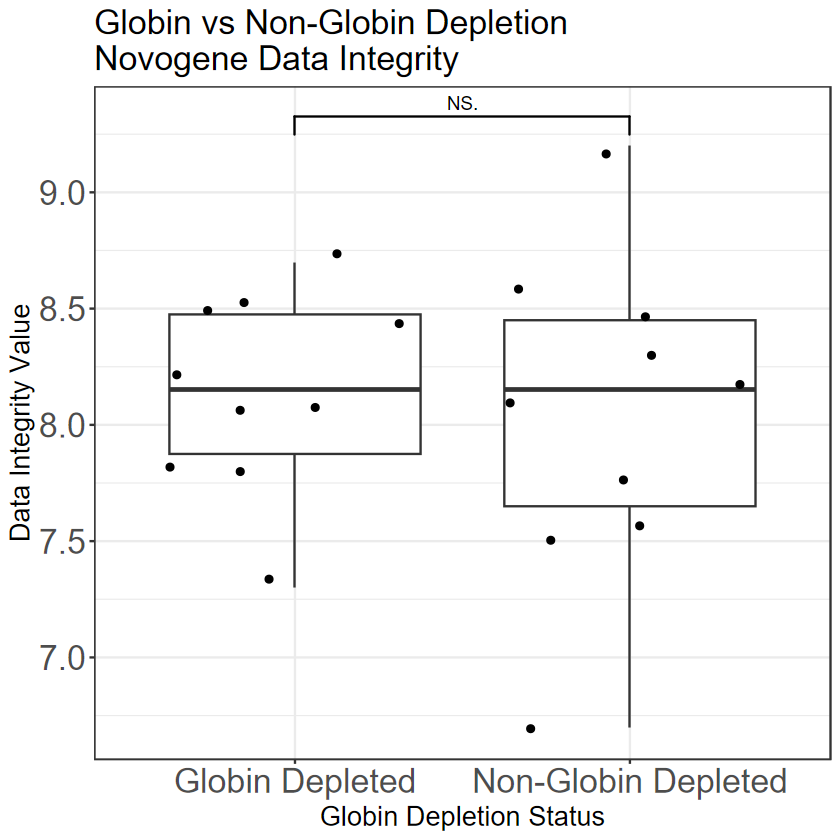

In [19]:
library(ggsignif)
p <- ggplot(df, aes(x=Sample.Type, y=Integrity.value)) +
    geom_boxplot() +
    labs(title="Globin vs Non-Globin Depletion\nNovogene Data Integrity",
        y="Data Integrity Value",
       x="Globin Depletion Status") +
    theme_bw() +
    geom_jitter(jitter = 0.2) +
    geom_signif(comparisons = list(c("Non-Globin Depleted", "Globin Depleted")), test = "wilcox.test",
        map_signif_level=TRUE
        ) +
    theme(
        plot.title = element_text(size = 20),  # Increase title font size
        axis.title.x = element_text(size = 16),  # Increase x-axis label font size
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 20),     # Increase x-axis text (group labels) font size
        axis.text.y = element_text(size = 20),     # Increase y-axis text font size
        legend.text = element_text(size = 20),     # Increase legend text font size
        legend.title = element_text(size = 18)   # Increase y-axis label font size
    ) 
    
ggsave("data_integrity.png", plot = p, dpi = 300)

p

Warning message in geom_jitter(jitter = 0.2):
"Ignoring unknown parameters: `jitter`"
Saving 6.67 x 6.67 in image


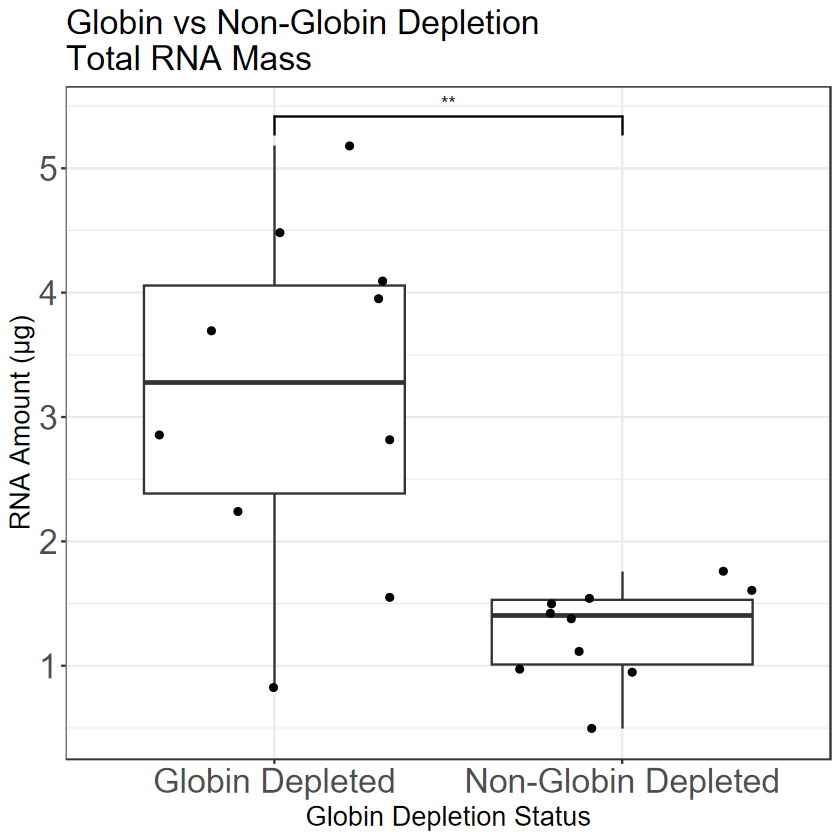

In [21]:
library(ggsignif)
p <- ggplot(df, aes(x=Sample.Type, y=Total.amount.ug.)) +
    geom_boxplot() +
    labs(title="Globin vs Non-Globin Depletion\nTotal RNA Mass",
        y="RNA Amount (µg)",
       x="Globin Depletion Status") +
    theme_bw() +
    geom_jitter(jitter = 0.2) +
    geom_signif(comparisons = list(c("Non-Globin Depleted", "Globin Depleted")), test = "wilcox.test",
        map_signif_level=TRUE
        ) +
    theme(
        plot.title = element_text(size = 20),  # Increase title font size
        axis.title.x = element_text(size = 16),  # Increase x-axis label font size
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 20),     # Increase x-axis text (group labels) font size
        axis.text.y = element_text(size = 20),     # Increase y-axis text font size
        legend.text = element_text(size = 20),     # Increase legend text font size
        legend.title = element_text(size = 18)   # Increase y-axis label font size
    ) 
    
ggsave("rna_amount.png", plot = p, dpi = 300)

p

Warning message in geom_jitter(jitter = 0.2):
"Ignoring unknown parameters: `jitter`"
Saving 6.67 x 6.67 in image
Warning message in wilcox.test.default(c(24, 30, 32, 28, 29, 26, 27, 30, 39, 31), :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(24, 30, 32, 28, 29, 26, 27, 30, 39, 31), :
"cannot compute exact p-value with ties"


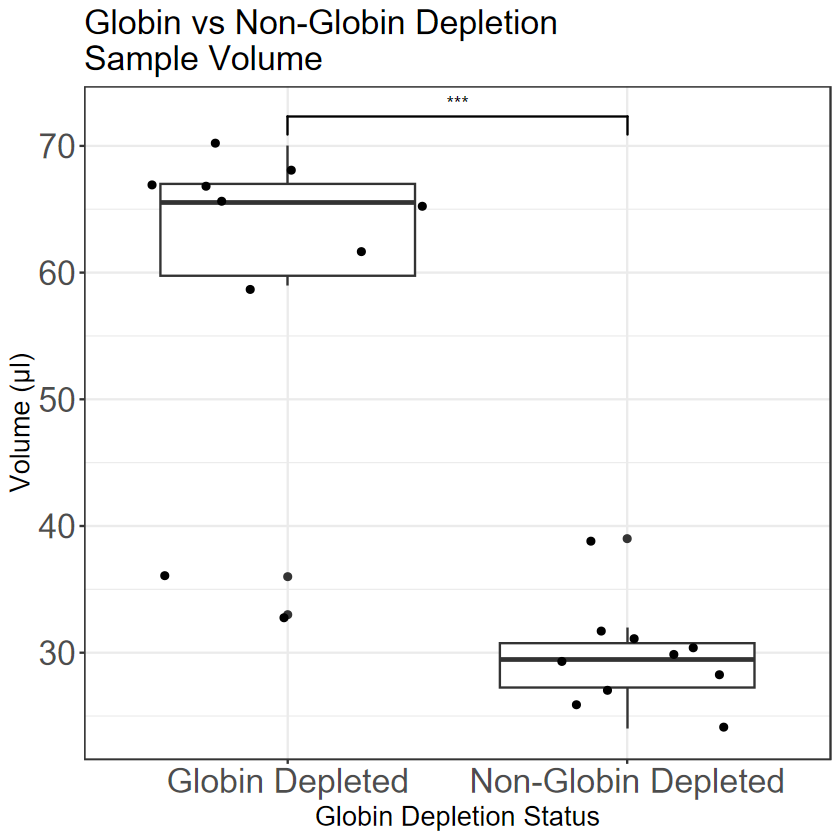

In [22]:
library(ggsignif)
p <- ggplot(df, aes(x=Sample.Type, y=Volume.ul.)) +
    geom_boxplot() +
    labs(title="Globin vs Non-Globin Depletion\nSample Volume",
        y="Volume (µl)",
       x="Globin Depletion Status") +
    theme_bw() +
    geom_jitter(jitter = 0.2) +
    geom_signif(comparisons = list(c("Non-Globin Depleted", "Globin Depleted")), test = "wilcox.test",
        map_signif_level=TRUE
        ) +
    theme(
        plot.title = element_text(size = 20),  # Increase title font size
        axis.title.x = element_text(size = 16),  # Increase x-axis label font size
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 20),     # Increase x-axis text (group labels) font size
        axis.text.y = element_text(size = 20),     # Increase y-axis text font size
        legend.text = element_text(size = 20),     # Increase legend text font size
        legend.title = element_text(size = 18)   # Increase y-axis label font size
    ) 
    
ggsave("Volume.png", plot = p, dpi = 300)

p

Warning message in geom_jitter(jitter = 0.2):
"Ignoring unknown parameters: `jitter`"
Saving 6.67 x 6.67 in image
Warning message in wilcox.test.default(c(67, 50, 55, 55, 49, 19, 35, 46, 25, 36), :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(c(67, 50, 55, 55, 49, 19, 35, 46, 25, 36), :
"cannot compute exact p-value with ties"


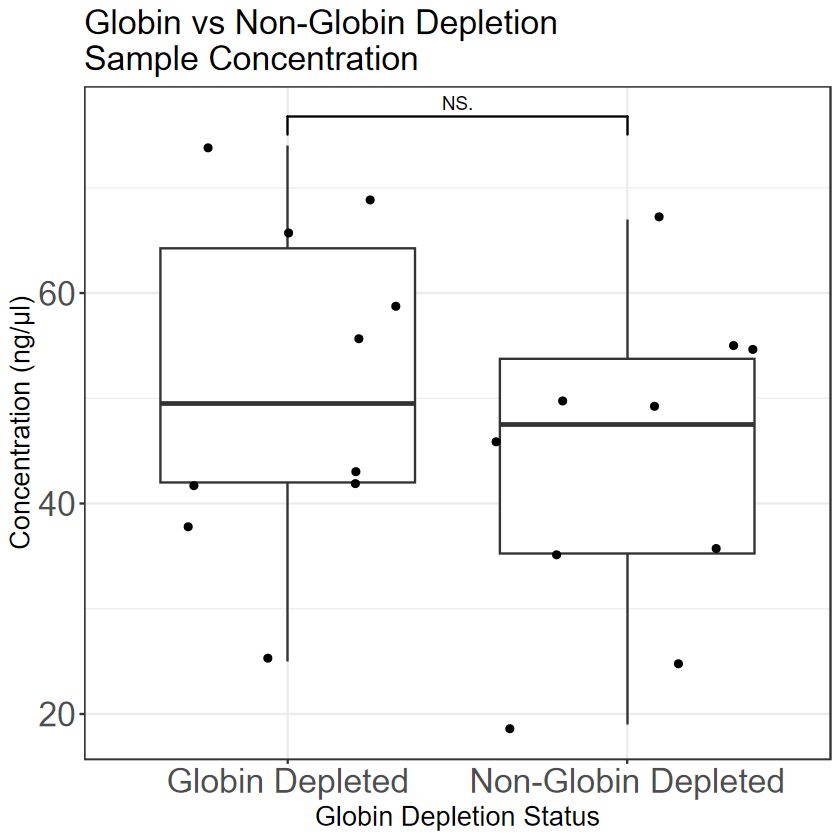

In [24]:
library(ggsignif)
p <- ggplot(df, aes(x=Sample.Type, y=Concentration.ng.ul.)) +
    geom_boxplot() +
    labs(title="Globin vs Non-Globin Depletion\nSample Concentration",
        y="Concentration (ng/µl)",
       x="Globin Depletion Status") +
    theme_bw() +
    geom_jitter(jitter = 0.2) +
    geom_signif(comparisons = list(c("Non-Globin Depleted", "Globin Depleted")), test = "wilcox.test",
        map_signif_level=TRUE
        ) +
    theme(
        plot.title = element_text(size = 20),  # Increase title font size
        axis.title.x = element_text(size = 16),  # Increase x-axis label font size
        axis.title.y = element_text(size = 16),
        axis.text.x = element_text(size = 20),     # Increase x-axis text (group labels) font size
        axis.text.y = element_text(size = 20),     # Increase y-axis text font size
        legend.text = element_text(size = 20),     # Increase legend text font size
        legend.title = element_text(size = 18)   # Increase y-axis label font size
    ) 
    
ggsave("Concentration.png", plot = p, dpi = 300)

p